In [ ]:
from nsepy import get_history
from datetime import datetime
import dateutil.relativedelta
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

end1 = datetime.now()
start1 = datetime(end1.year-1,end1.month,end1.day)


ticker = input('enter symbol')
data=get_history(symbol=ticker,start=start1,end=end1)

#data['Close'].plot()
#plt.show()


data.reset_index(level=0, inplace=True)
data = data.drop(columns=['Symbol','Series'])

plt.figure(figsize=(18,6))
plt.plot(data['Close'])



data = data.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
    
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = new_data.values

train = dataset[0:190,:]
valid = dataset[190:,:]



In [2]:
dataset.shape

(244, 1)

C:\Users\Nihal Patel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/1
 - 12s - loss: 0.0215


C:\Users\Nihal Patel\Anaconda3\lib\site-packages\ipykernel\__main__.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


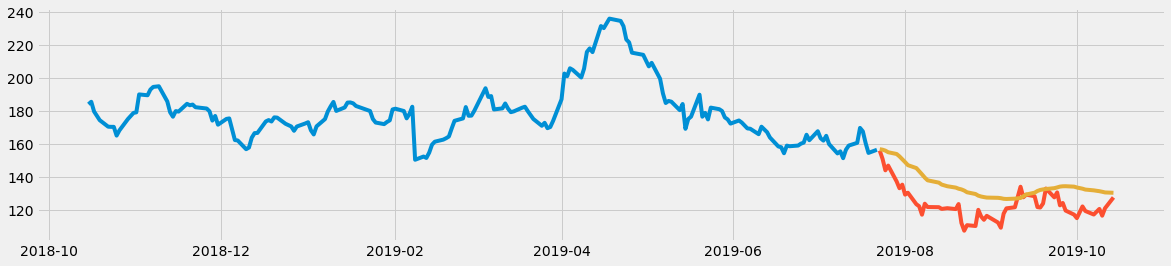

In [2]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


import numpy as np
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)



#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)


X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)


X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)



train = new_data[:190]
valid = new_data[190:]
valid['Predictions'] = closing_price
plt.figure(figsize=(18,4))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


    

In [3]:
rms

13.668396214171089

In [5]:
dataset

array([[184.34999999999999],
       [185.84999999999999],
       [179.94999999999999],
       [174.69999999999999],
       [170.75],
       [170.65000000000001],
       [170.65000000000001],
       [165.34999999999999],
       [168.5],
       [175.34999999999999],
       [177.25],
       [179.09999999999999],
       [179.44999999999999],
       [190.30000000000001],
       [189.80000000000001],
       [193.25],
       [194.84999999999999],
       [195.25],
       [186.05000000000001],
       [179.5],
       [176.80000000000001],
       [180.19999999999999],
       [179.90000000000001],
       [184.59999999999999],
       [183.75],
       [184.15000000000001],
       [182.55000000000001],
       [181.75],
       [180.05000000000001],
       [174.44999999999999],
       [177.25],
       [171.94999999999999],
       [175.44999999999999],
       [175.75],
       [169.19999999999999],
       [162.65000000000001],
       [162.40000000000001],
       [157.09999999999999],
       [158.09999999

In [7]:
new_data.shape

(244, 1)